# Root Questions - Non-Finite clauseType


Note: Since these are technically, ungrammatical, I have not done an extensive analysis of these.

(In this Notebook, I look at the breakdown of verbs in each kind of questions to understand better the semantic content of different types of questions. For each wh-question type, I look first at emb_verb, the code for the first verb in the question, then v2_after, and then mat_verb. )

In [1]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import re

In [2]:
df = pd.read_json("final_corpus.json")

In [3]:
len(df)

427079

In [4]:
# # Remove the Brown corpus
df = df[df.corpus != "brown"]

In [5]:
len(df) #422983

422983

In [6]:
df['emb_verb'] = df['emb_verb'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})
df['v1_after'] = df['v1_after'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})

In [7]:
root = df[df.questType == "Root Question"]

In [130]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# clauseType

In [15]:
mod = root[root.clauseType == "Modal"]
fin = root[root.clauseType == "Finite"]
nonfin = root[root.clauseType == "Non-Finite"]

In [131]:
# nonfin.sentence

# A. Non-Finite
This should only be root questions because non-finite clauses are not acceptable in roots

To do:
1. understand the distribution of rootedded verbs
2. understand the distribution of different wh-words

In [48]:
len(nonfin)/len(root)*100

0.08395623442747265

In [47]:
len(root)

36924

In [39]:
nf_vs = nonfin.groupby('emb_verb').filter(lambda x: len(x) >= 100)

The thing here about finding all the verbs across the total non-finite df, is that you don't see how there are differences based on how the different wh-words are headed.

Ideally, then would have to do this for each wh

In [43]:
nonfin.groupby(["questType", "wh", "emb_verb"])["questType"].count()

questType      wh     emb_verb 
Root Question  how    's           7
                      ask          1
                      avoid        1
                      be           1
                      do           1
                      dress        1
                      escape       1
                      feel         1
                      get          1
                      inculcate    1
                      make         2
                      overcome     1
                      put          1
                      replenish    1
                      seal         1
               where  'll          1
                      ask          1
                      ca           1
                      stress       1
                      teach        1
                      ’            2
               who    come         1
                      write        1
Name: questType, dtype: int64

In [16]:
nonfin_how = nonfin.loc[nonfin.wh.isin(["how"])]
nonfin_who = nonfin.loc[nonfin.wh.isin(["who"])]
nonfin_where = nonfin.loc[nonfin.wh.isin(["where"])]

# A1. Non-Finite How-questions

In [17]:
nonfin_how.groupby(["emb_verb"])["emb_verb"].count()

emb_verb
's           7
ask          1
avoid        1
be           1
do           1
dress        1
escape       1
feel         1
get          1
inculcate    1
make         2
overcome     1
put          1
replenish    1
seal         1
Name: emb_verb, dtype: int64

In [47]:
# nf_how_vs = nonfin_how.groupby('emb_verb').filter(lambda x: len(x) >= 15)

In [18]:
nf_how_vs_count = nonfin_how.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)

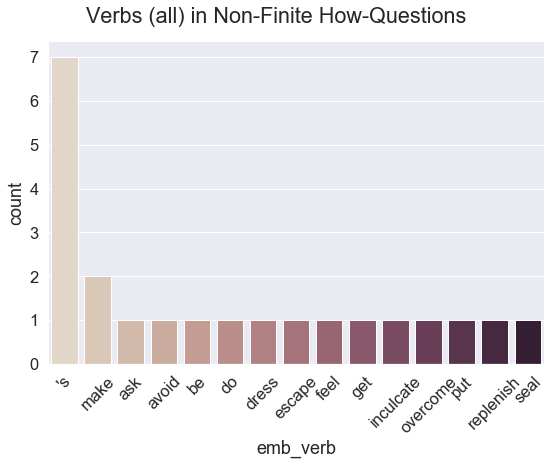

In [22]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=nf_how_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs (all) in Non-Finite How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [132]:
# nonfin_how.sentence

# A2. Non-Finite Where Questions

In [133]:
# nonfin_where.sentence

In [122]:
len(nonfin_where)

432

In [26]:
# nf_where_vs = nonfin_where.groupby('emb_verb').filter(lambda x: len(x) >= 2)

In [29]:
nf_where_vs_count = nonfin_where.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [30]:
nf_where_vs_count

,emb_verb,count
5,’,2
0,'ll,1
1,ask,1
2,ca,1
3,stress,1
4,teach,1


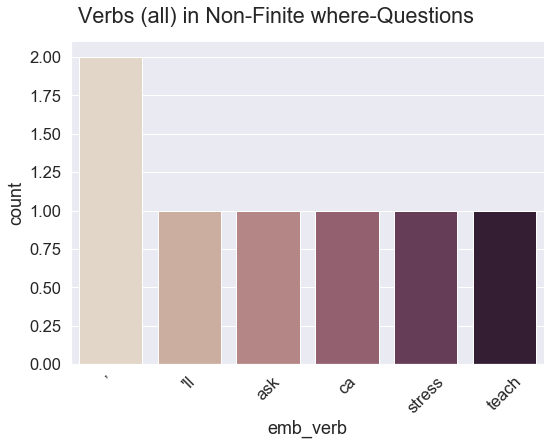

In [32]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=nf_where_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs (all) in Non-Finite where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# A3. Non-Finite Who Questions

In [128]:
len(nonfin_who)

61

In [ ]:
nonfin_who.sentence

In [33]:
# nf_who_vs = nonfin_who.groupby('emb_verb').filter(lambda x: len(x) >= 5)

In [37]:
nf_who_vs_count = nonfin_who.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)

,emb_verb,count
0,come,1
1,write,1


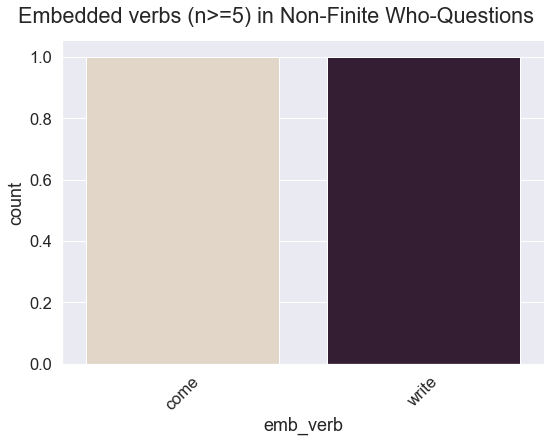

In [36]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=nf_who_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Embedded verbs (n>=5) in Non-Finite Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()